# Logistic Regression

### To predict whether a patient has 10-Year Risk of Coronary Heart Disease

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
import scipy.stats as st

In [2]:
#Importing Logistic Regression 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [3]:
#Loading dataset

data = pd.read_csv('Heart Disease.csv')
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Metadata

- BPMeds: whether or not the patient was on blood pressure medication
- prevalentStroke: whether or not the patient had previously had a stroke
- prevalentHyp: whether or not the patient was hypertensive
- diabetes: whether or not the patient had diabetes
- totChol: total cholesterol level
- sysBP: systolic blood pressure
- diaBP: diastolic blood pressure
- BMI: Body Mass Index
- heartRate: heart rate
- glucose: glucose level
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”) (Predictor Variable)

---

# Exploring the Data

In [4]:
#Describing the data
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [5]:
#Rows and Columns
data.shape

(4240, 16)

In [6]:
#Checking null values
data.isnull().sum()

#Not removing any columns based on null values

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
#To check total number of rows with NA values

count=0
for i in data.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)      

Total number of rows with missing values is  582


In [8]:
#To remove all rows with NA values

data.dropna(axis=0,inplace=True)      #Axis = 0 is used for rows
data = data.copy()

In [9]:
#To check updated rows and columns
data.shape

(3658, 16)

0    3101
1     557
Name: TenYearCHD, dtype: int64

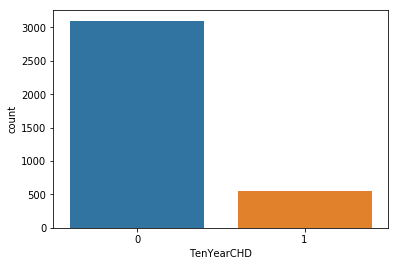

In [10]:
#Exploring target variable
sns.countplot(x='TenYearCHD', data=data)

data.TenYearCHD.value_counts()

---

# Logistic Regression

In [11]:
#To view the columns for creating dependent and independent variables
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [12]:
#Creating independent (Predictor) and dependent variables (Target)
X = data[['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']]

y = data['TenYearCHD']

In [13]:
#Splitting the data into training and testing (70% Train and 30% Test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [14]:
#Instantiating the LogisticRegression Object
logreg = LogisticRegression()

In [15]:
#Fitting the model on our training data using fit method
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
#Making predictions on Testing Model
y_pred = logreg.predict(X_test)

---

# Evaluating the Model

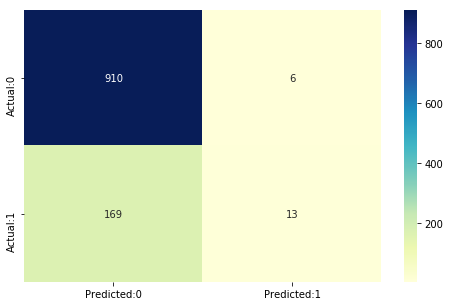

In [17]:
#Creating Confusion Matrix to evaluate the model

cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.show()

The confusion matrix shows 910+13 = 923 correct predictions and 169 + 6 = 175 incorrect ones.

In [18]:
#True Negative, True Positive, False Negative, False Positive
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]

In [19]:
#Accuracy
print('The acuracy of the model = TP+TN/(TP+TN+FP+FN) = ', round((TP+TN)/float(TP+TN+FP+FN),3))

The acuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.841


In [20]:
#Misclassification
print('The Missclassification = 1-Accuracy = ', round(1-((TP+TN)/float(TP+TN+FP+FN)), 3))

The Missclassification = 1-Accuracy =  0.159


In [21]:
#Sensitivity
print('Sensitivity or True Positive Rate = TP/(TP+FN) = ', round(TP/float(TP+FN),3))

Sensitivity or True Positive Rate = TP/(TP+FN) =  0.071


In [22]:
#Specificity
print('Specificity or True Negative Rate = TN/(TN+FP) = ', round(TN/float(TN+FP),3))

Specificity or True Negative Rate = TN/(TN+FP) =  0.993


In [23]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.84      0.99      0.91       916
          1       0.68      0.07      0.13       182

avg / total       0.82      0.84      0.78      1098



---

# AUC - ROC Curve

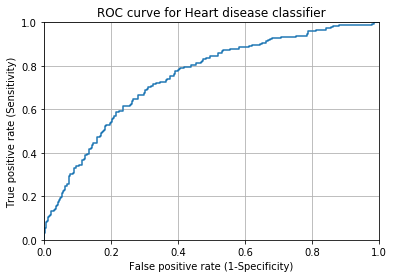

In [24]:
### ROC Curve
from sklearn.metrics import roc_curve

y_pred_prob_yes=logreg.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

plt.grid(True)

In [25]:
#AUC - Area Under Curve

round(metrics.roc_auc_score(y_test,y_pred_prob_yes[:,1]),3)

0.748

# K-Fold Cross-Validation

In [26]:
# 10-fold cross-validation logistic regression
from sklearn.model_selection import cross_val_score
logreg = LogisticRegression()

# Use cross_val_score function
# We are passing the entirety of X and y since cross validation takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')

print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.853
LogisticRegression average auc is 0.726


Optimal number of features: 15
Selected features: ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


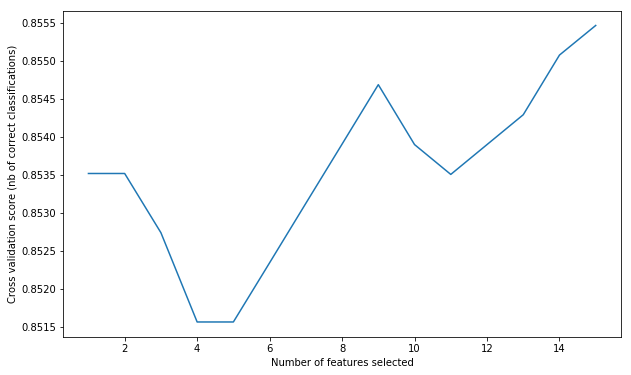

In [27]:
#To check accuracy of cross validation score with respect to number of features

from sklearn.feature_selection import RFECV

col = X_train.columns

rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X_train, y_train.values.ravel())

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X_train.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

---

### Reference:

- https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset
- https://www.kaggle.com/neisha/heart-disease-prediction-using-logistic-regression